# Medical Cost Analysis and Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset contains 1338 observations and 7 variables. The variables are as follows:


| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

### Importing all necessary libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Preprocessing

In [9]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Replacing the categorical variables with numerical values.
- sex : 1 - male, 0 - female
- smoker : 1 - yes, 0 - no
- region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest

In [22]:
#changing categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [24]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


## Exploratory Data Analysis

Visualization of the data is a good way to understand the data. In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

### Age Distribution

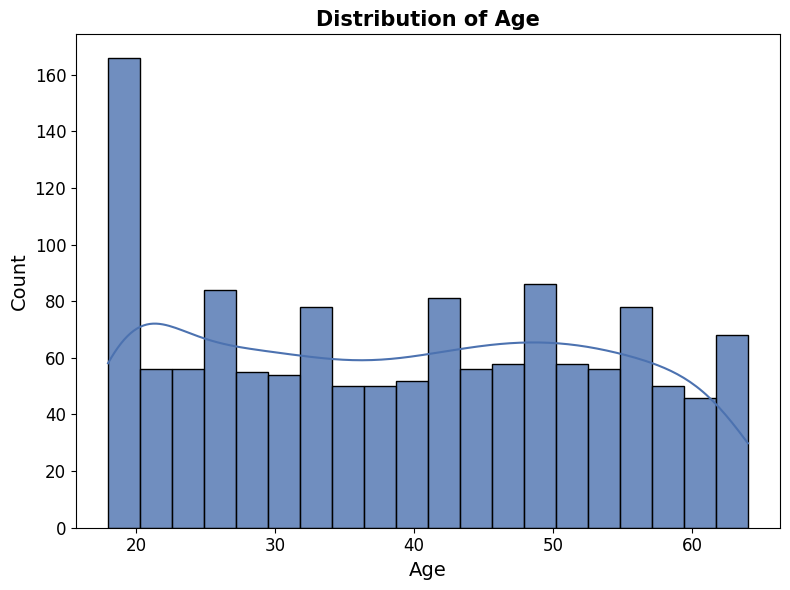

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='#4C72B0', edgecolor='black', alpha=0.8)

# Labels and title
plt.title('Distribution of Age', fontsize=15, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# layout
plt.tight_layout()
plt.show()

### Gender Distribution

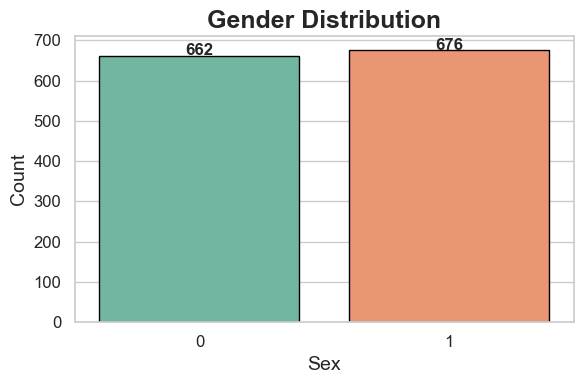

In [32]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='sex', data=df, palette='Set2', edgecolor='black')

# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# layout
plt.tight_layout()
plt.show()

It is clear that number of males and Females are almost equal in the dataset

### BMI Distribution

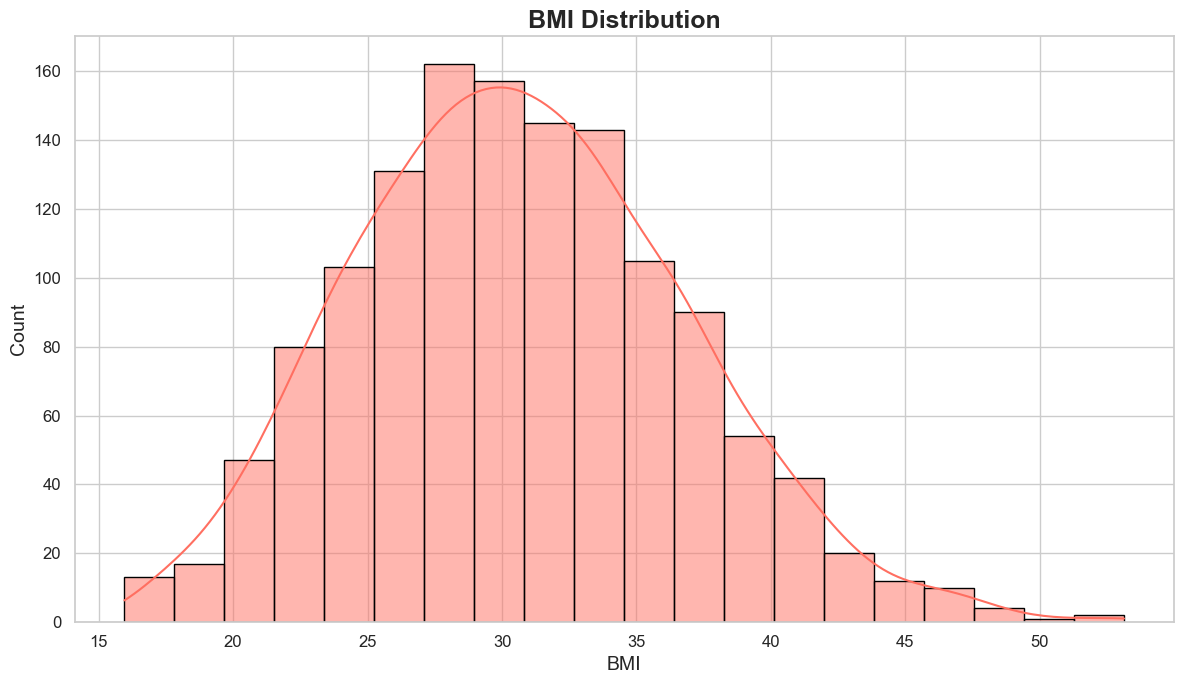

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.histplot(df.bmi, bins=20, kde=True, color='#FF6F61', edgecolor='black')

# Titles and labels
plt.title('BMI Distribution', fontsize=18, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# layout
plt.tight_layout()
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

### Children Count Distribution

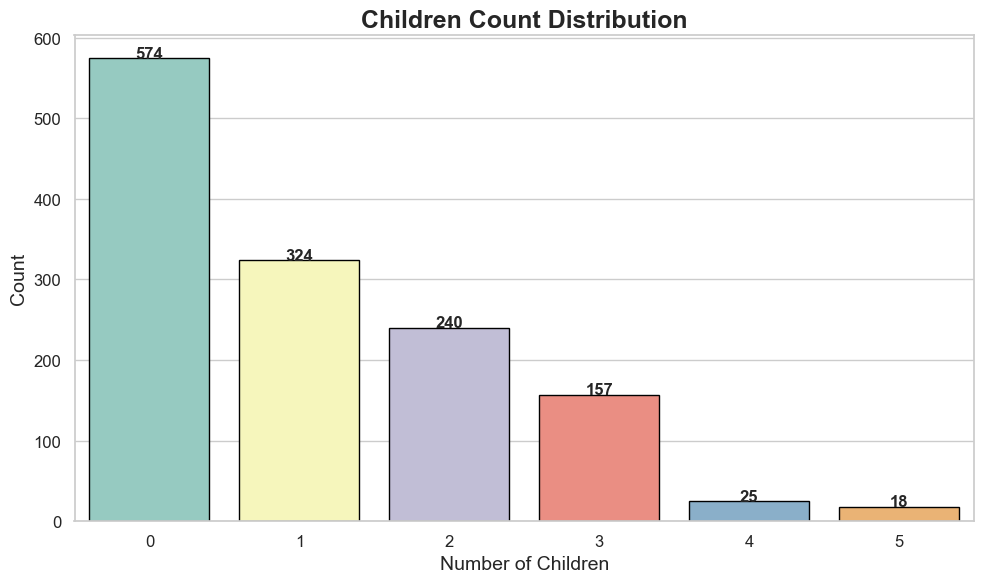

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='children', data=df, palette='Set3', edgecolor='black')

plt.title('Children Count Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Number of Children', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', fontsize=12, fontweight='bold')

# Layout
plt.tight_layout()
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

### Region Distribution

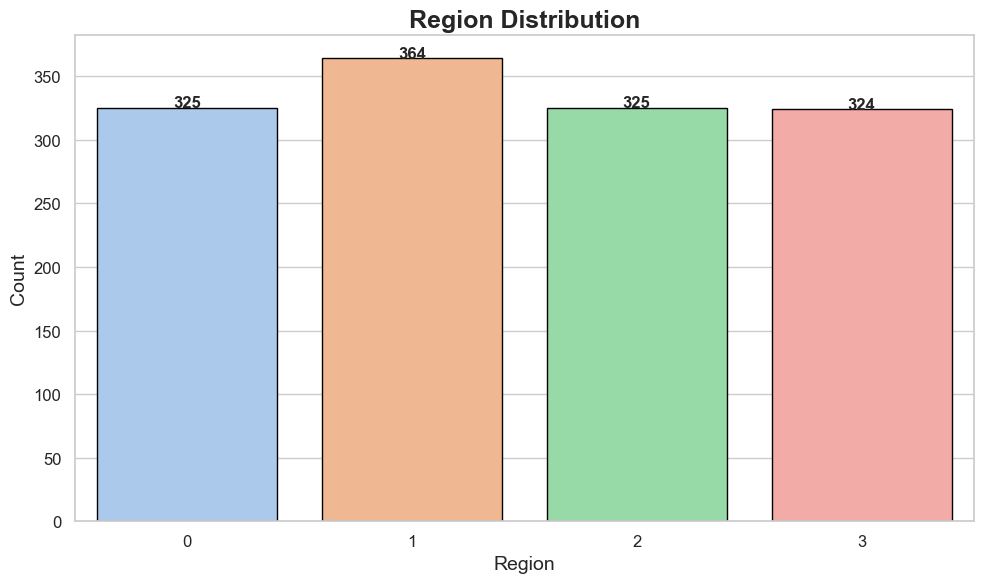

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', data=df, palette='pastel', edgecolor='black')

# Titles and labels
plt.title('Region Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', fontsize=12, fontweight='bold')

# layout
plt.tight_layout()
plt.show()

The count of patient from northwest is slightly higher than the other regions, but the number of patients from other region are almost equal.

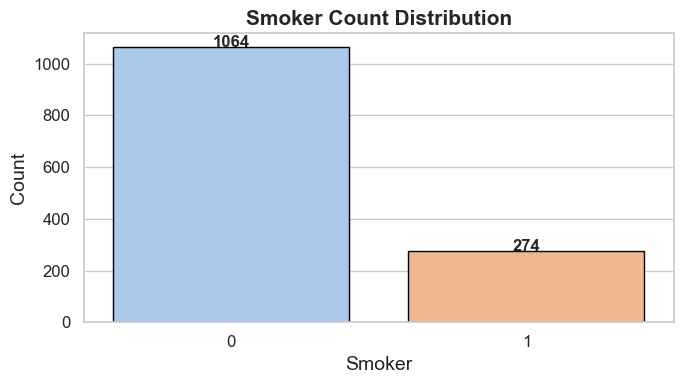

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='smoker', data=df, palette='pastel', edgecolor='black')

# Titles and labels
plt.title('Smoker Count Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', fontsize=12, fontweight='bold')

# layout
plt.tight_layout()
plt.show()

Smoker are very few in the dataset. Nearly 80% o fthe patients are non-smoker

### Medical Charges Distribution

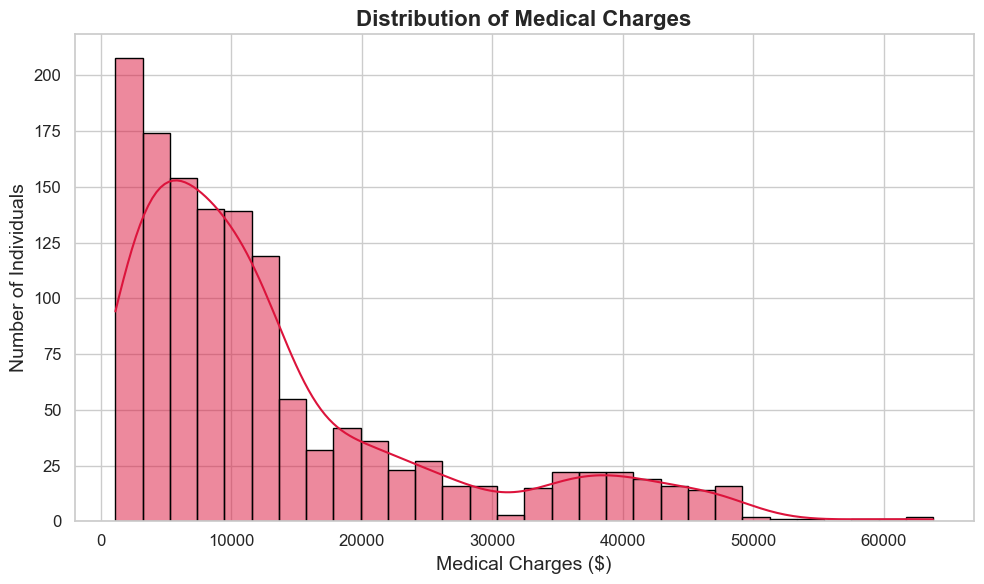

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df.charges, bins=30, kde=True, color='crimson', edgecolor='black')

# Title and labels
plt.title('Distribution of Medical Charges', fontsize=16, fontweight='bold')
plt.xlabel('Medical Charges ($)', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tight layout
plt.tight_layout()
plt.show()

Most of the medical expenses are below 20K, with Negligible number of patients having medical expenses above 50k

From all the above plots, We have a clear understanding about the count of patients under each category of the variable.

Now I will look into the Correlation between the variables.

## Correlation

In [56]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


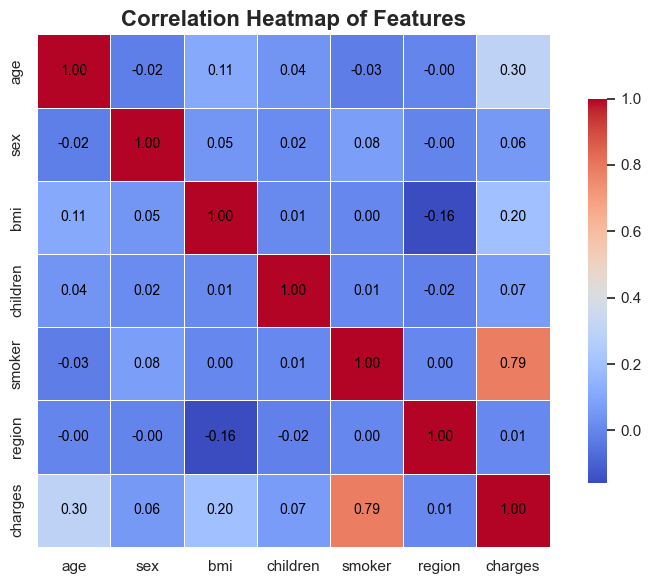

In [58]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10, "color": "black"}
)

# Title
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')

# Tidy layout
plt.tight_layout()
plt.show()

The variable smoker shows a significant Correlation with the medical expenses. 

Now I will exploremore into patient's smoking habit and their relationa with other factors

### Smoker Count with Patient's Gender

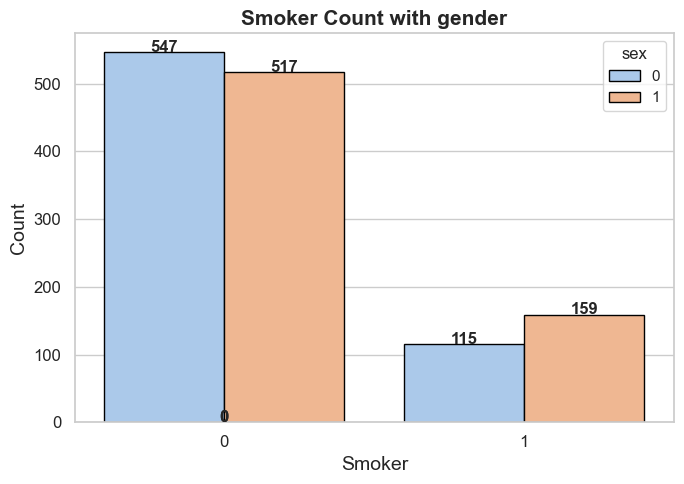

In [62]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='smoker',hue='sex', data=df, palette='pastel', edgecolor='black')

# Titles and labels
plt.title('Smoker Count with gender', fontsize=15, fontweight='bold')
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', fontsize=12, fontweight='bold')

# layout
plt.tight_layout()
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

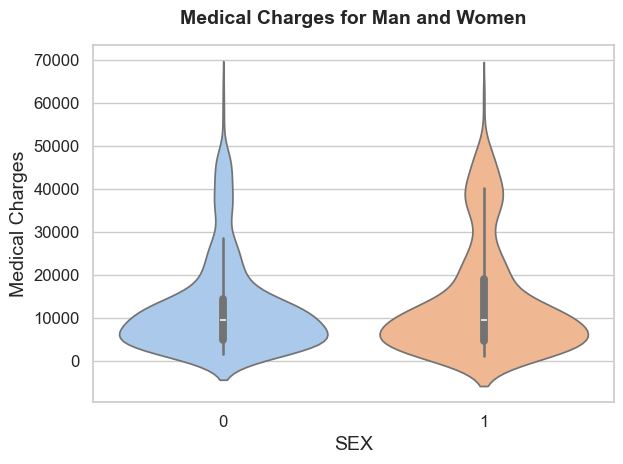

In [65]:
sns.set_style("whitegrid")
sns.violinplot(x='sex', y='charges', data=df, palette='pastel')

plt.title('Medical Charges for Man and Women', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('SEX', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

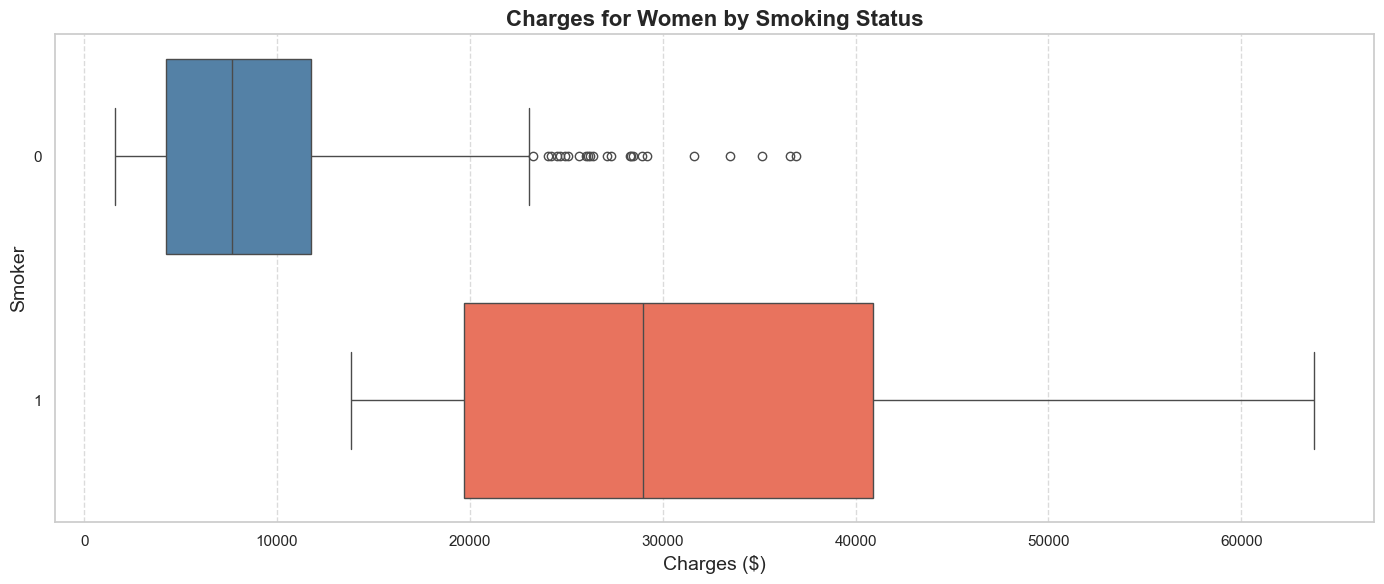

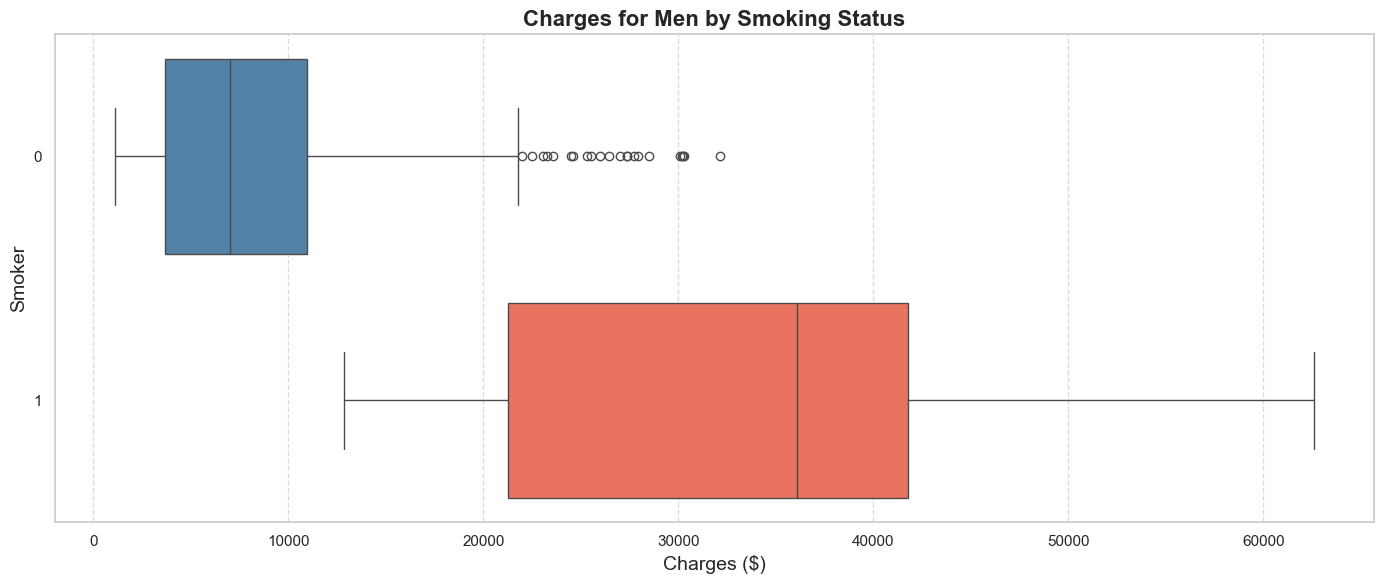

In [67]:
palette = {'1': "#FF6347", '0': "#4682B4"}  # red for smokers, blue for non-smokers

# Plot for women
plt.figure(figsize=(14,6))
plt.title("Charges for Women by Smoking Status", fontsize=16, weight='bold')
sns.boxplot(x="charges", y="smoker", data=df[df.sex == 0], orient="h", palette=palette)
#sns.stripplot(x="charges", y="smoker", data=df[df.sex == 0], orient="h", color='black', alpha=0.3, jitter=0.2)
plt.xlabel("Charges ($)", fontsize=14)
plt.ylabel("Smoker", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for men
plt.figure(figsize=(14,6))
plt.title("Charges for Men by Smoking Status", fontsize=16, weight='bold')
sns.boxplot(x="charges", y="smoker", data=df[df.sex == 1], orient="h", palette=palette)
#sns.stripplot(x="charges", y="smoker", data=df[df.sex == 1], orient="h", color='black', alpha=0.3, jitter=0.2)
plt.xlabel("Charges ($)", fontsize=14)
plt.ylabel("Smoker", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The assumption is true, that the medical expense of males is greater than that of females. In addituion to that medical expense of smokers is greater than that of non-smokers.

### Smokers VS Age Distribution

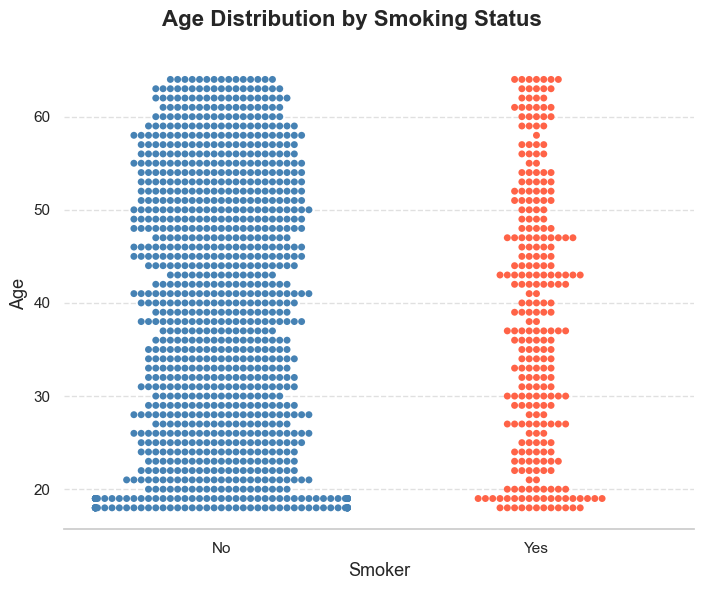

In [71]:
sns.set(style="whitegrid")
palette = {'0': "#4682B4", '1': "#FF6347"}  # 0 = non-smoker, 1 = smoker

g = sns.catplot(
    x="smoker",
    y="age",
    kind="swarm",
    data=df,
    palette=palette,
    height=6,
    aspect=1.2
)
g.set_axis_labels("Smoker", "Age", fontsize=13)
g.fig.suptitle("Age Distribution by Smoking Status", fontsize=16, weight="bold")
g.set(xticks=[0, 1], xticklabels=["No", "Yes"])
g.despine(left=True)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

From the graph, we can see that there significant number of smokers of age 19. Now I will study the medical expense of smokers of age 19.

### Smoker Distribution at Age of 19

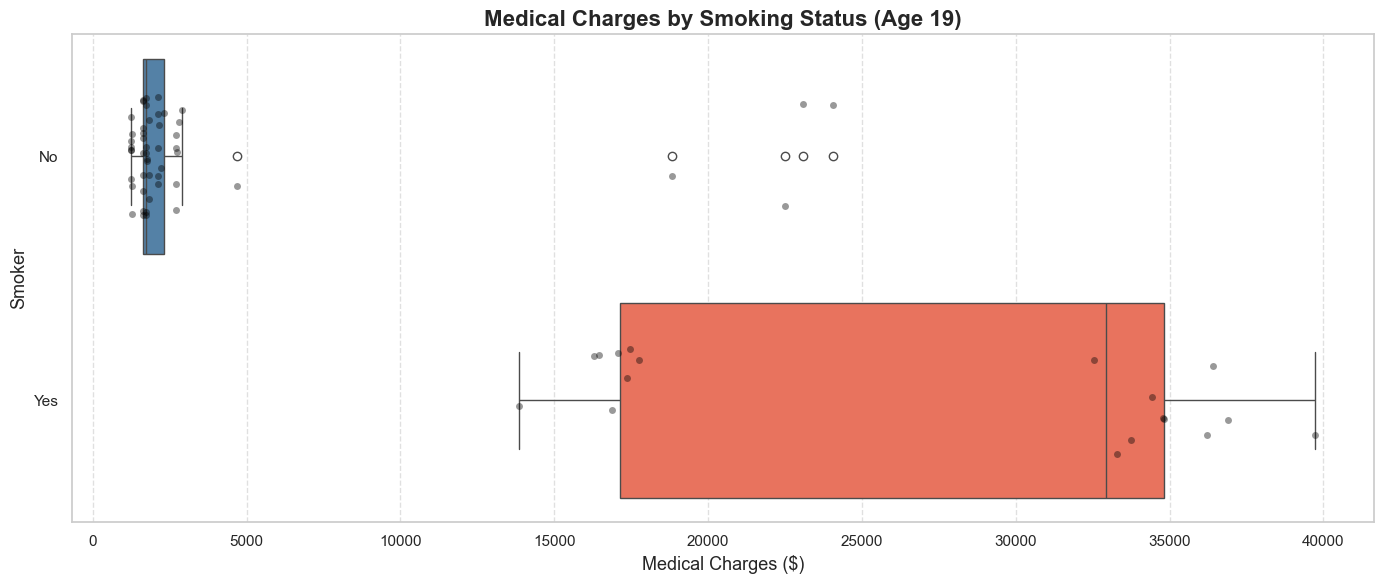

In [75]:
sns.set(style="whitegrid")
palette = {'0': "#4682B4", '1': "#FF6347"}  # Blue for non-smokers, red for smokers


df_19 = df[df.age == 19]    # Filter data for age 19

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="charges",
    y="smoker",
    data=df_19,
    orient="h",
    palette=palette
)

sns.stripplot(
    x="charges",
    y="smoker",
    data=df_19,
    orient="h",
    color="black",
    alpha=0.4,
    jitter=0.25,
    size=5
)

# Titles, Labels and Layout
plt.title("Medical Charges by Smoking Status (Age 19)", fontsize=16, weight="bold")
plt.xlabel("Medical Charges ($)", fontsize=13)
plt.ylabel("Smoker", fontsize=13)
plt.yticks([0, 1], ["No", "Yes"])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non-smoker.
In non-smoker, We can see some outliers, Which may be due to illness or accidents

It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

### Non-Smoker Charges Distribution

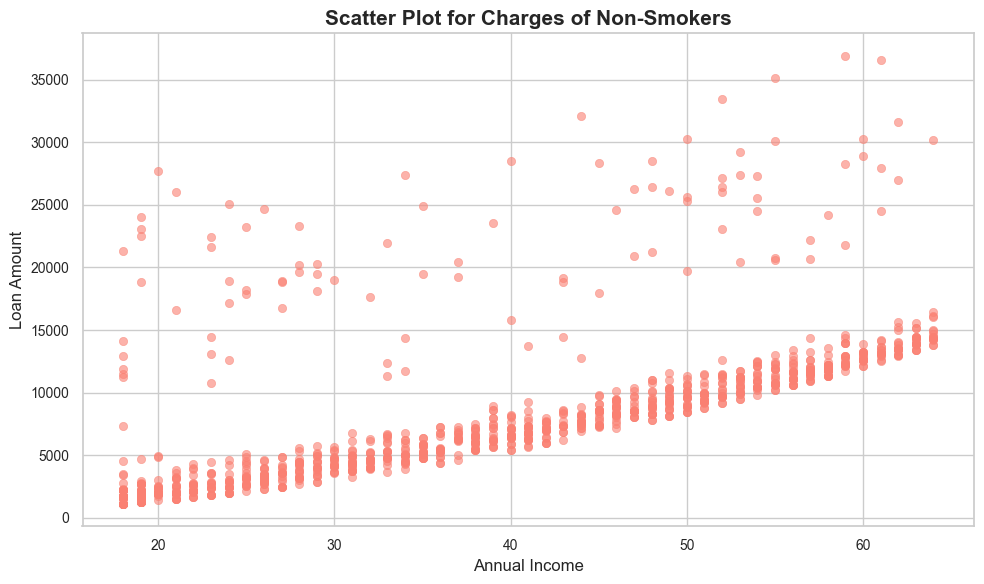

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='age',
    y='charges',
    data=df[(df.smoker == 0)],
    color='salmon',
    alpha=0.6,
    edgecolor=None
)

plt.title('Scatter Plot for Charges of Non-Smokers', fontsize=15, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

### Smoker's Charges Distribution

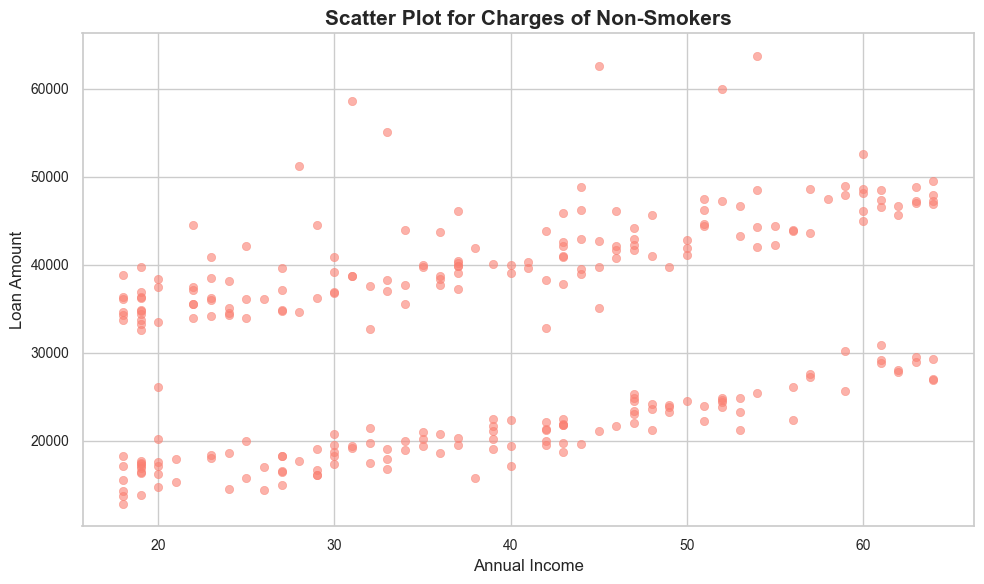

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='age',
    y='charges',
    data=df[(df.smoker == 1)],
    color='salmon',
    alpha=0.6,
    edgecolor=None
)

plt.title('Scatter Plot for Charges of Non-Smokers', fontsize=15, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

### Charges distribution for patients with BMI greater than 30 i.e. obese patients

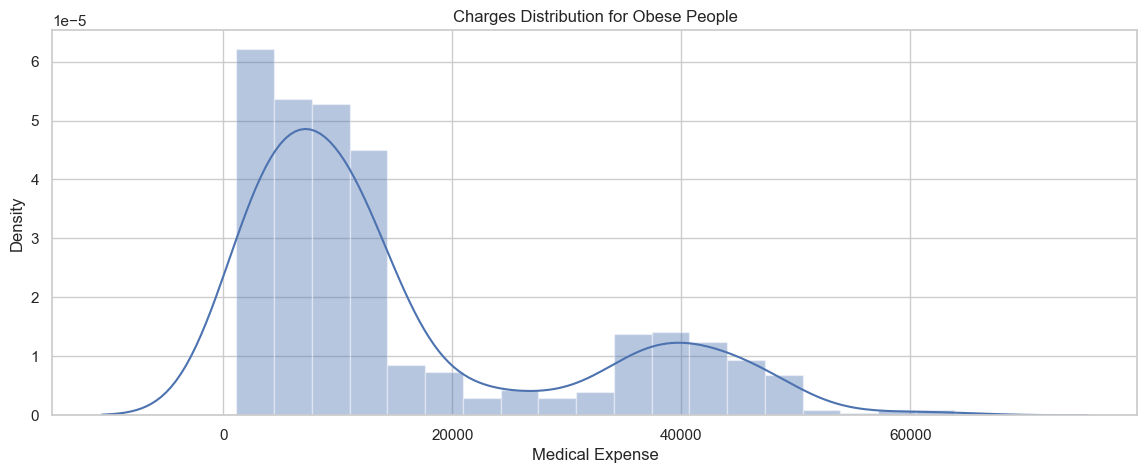

In [88]:
#bmi charges distribution for obese people
plt.figure(figsize=(14,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

### Charges distribution for patients with BMI less than 30 i.e. obese patients

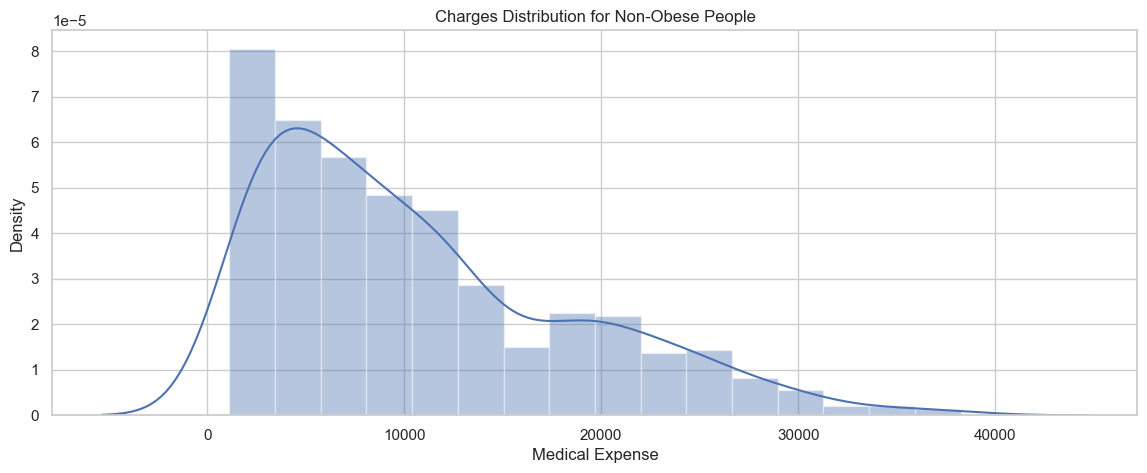

In [91]:
#bmi charges distribution for non-obese people
plt.figure(figsize=(14,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non-Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

#### Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

## Train and Test Split

In [96]:
x = df.drop('charges',axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [98]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

<class 'pandas.core.frame.DataFrame'> (1070, 6)
<class 'pandas.core.series.Series'> (1070,)


## Model Evaluation

I will be using the following machine learning models to predcit the status:
1. Decision Tree Classifier
2. Random Forest Classifier

### Linear Regression

In [103]:
lr = LinearRegression()

# Model Training
lr.fit(x_train, y_train)

# Model Accuracy
print("Score of Linear Regression Model: ", lr.score(x_train, y_train))

Score of Linear Regression Model:  0.7368306228430945


In [105]:
# Model Prediction
lr_pred = lr.predict(x_test)

### Polynomial Regression

In [108]:
poly_reg = PolynomialFeatures(degree=2)

poly_reg

PolynomialFeatures()

In [110]:
#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)

#splitting the data
x_pol_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)

In [112]:
plr = LinearRegression()

#model training
plr.fit(x_pol_train,y_train)

#model accuracy
plr.score(x_pol_train,y_train)

0.8372892413634141

In [114]:
#model prediction
y_pol_pred = plr.predict(x_test)

### Decision Tree Regressor

In [121]:
dtree = DecisionTreeRegressor()

#model training
dtree.fit(x_pol_train,y_train)

#model accuracy
print("Decision Tree Regressor Model Score: ",dtree.score(x_pol_train,y_train))

Decision Tree Regressor Model Score:  0.9993688476658964


In [123]:
dtree_pred = dtree.predict(x_test)

### Random Forest Regressor

In [126]:
rf = RandomForestRegressor(n_estimators=100)

#model training
rf.fit(x_pol_train,y_train)

#model accuracy
print("Random Forest Regressor Model's Score: ", rf.score(x_pol_train,y_train))

Random Forest Regressor Model's Score:  0.9749279347286125


In [128]:
rf_pred = rf.predict(x_test)

## Model Evaluation

### Distribution of Actual and Predicted Values

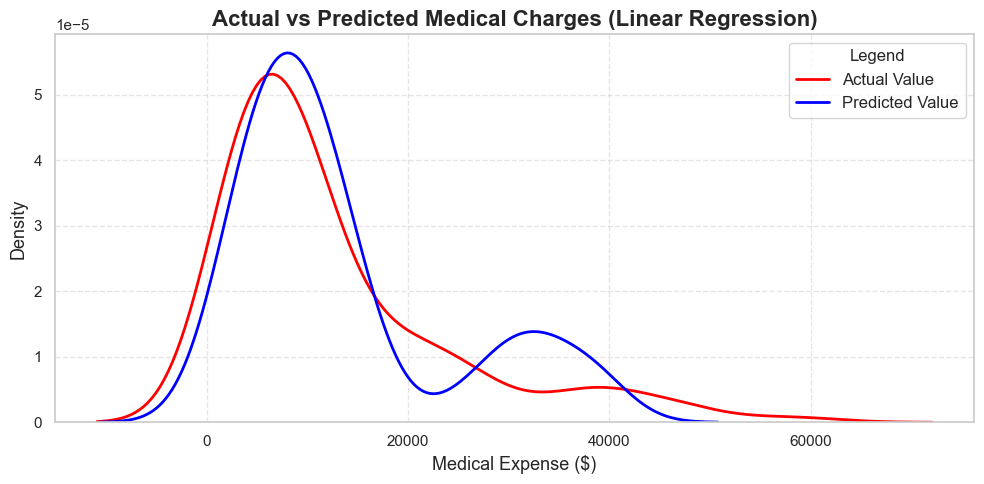

In [132]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='red', label='Actual Value', linewidth=2)
sns.kdeplot(lr_pred, color='blue', label='Predicted Value', linewidth=2)

plt.title('Actual vs Predicted Medical Charges (Linear Regression)', fontsize=16, weight='bold')
plt.xlabel('Medical Expense ($)', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(title='Legend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

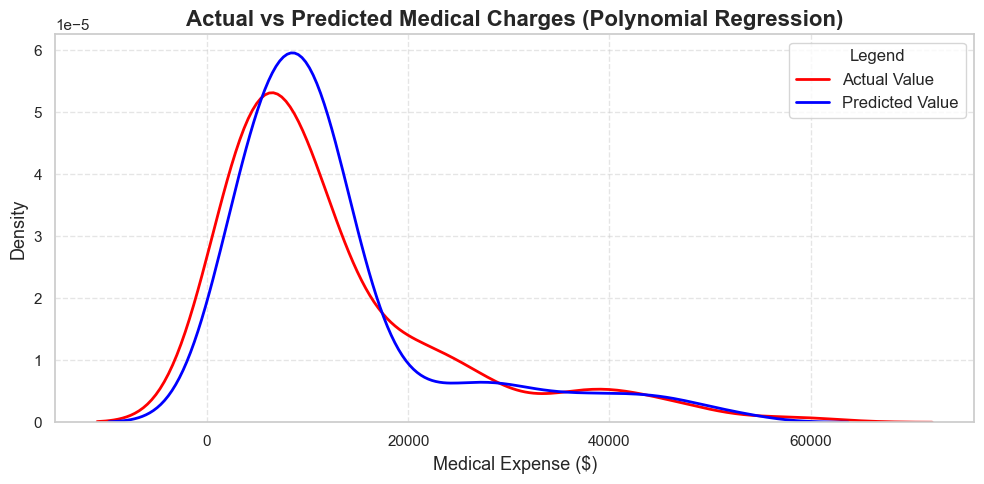

In [148]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='red', label='Actual Value', linewidth=2)
sns.kdeplot(y_pol_pred, color='blue', label='Predicted Value', linewidth=2)

plt.title('Actual vs Predicted Medical Charges (Polynomial Regression)', fontsize=16, weight='bold')
plt.xlabel('Medical Expense ($)', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(title='Legend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [152]:
print('MAE:', mean_absolute_error(y_test, y_pol_pred))
print('MSE:', mean_squared_error(y_test, y_pol_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pol_pred)))
print('R2 Score:', r2_score(y_test, y_pol_pred))

MAE: 2988.6209328037385
MSE: 24512834.76736685
RMSE: 4951.043805842041
R2 Score: 0.8221476996025613


### Decision Tree Regressor's Actual and Predicted value Comparison

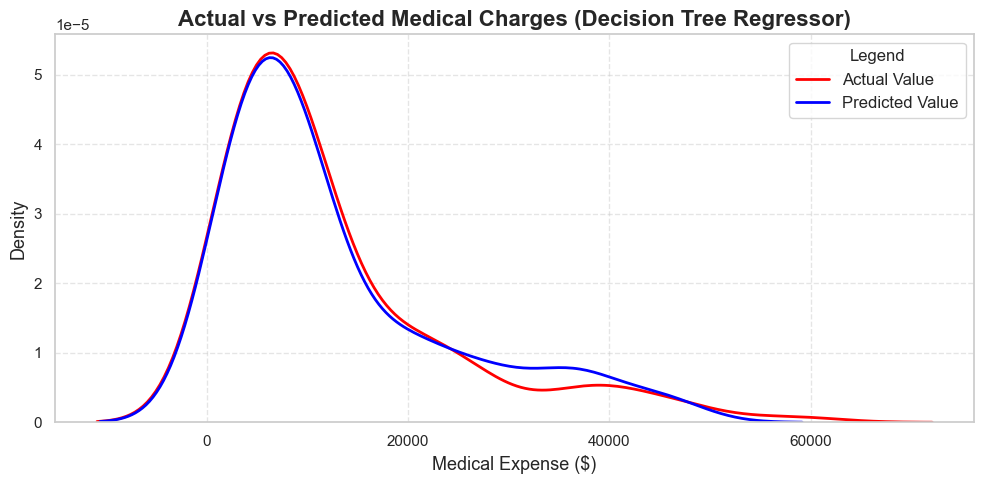

In [155]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='red', label='Actual Value', linewidth=2)
sns.kdeplot(dtree_pred, color='blue', label='Predicted Value', linewidth=2)

plt.title('Actual vs Predicted Medical Charges (Decision Tree Regressor)', fontsize=16, weight='bold')
plt.xlabel('Medical Expense ($)', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(title='Legend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [157]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 3454.077865046729
MSE: 51598838.31711561
RMSE: 7183.233138156913
Accuracy: 0.6256258331757074


### Random Forest Regressor's Actual and Predicted Value Comparison

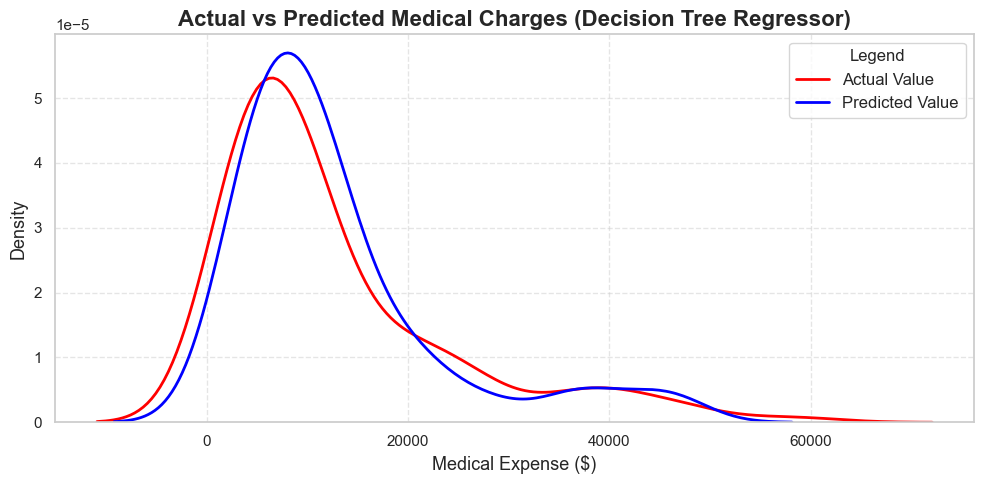

In [160]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='red', label='Actual Value', linewidth=2)
sns.kdeplot(rf_pred, color='blue', label='Predicted Value', linewidth=2)

plt.title('Actual vs Predicted Medical Charges (Decision Tree Regressor)', fontsize=16, weight='bold')
plt.xlabel('Medical Expense ($)', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(title='Legend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [162]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2882.38666754412
MSE: 27386359.226166762
RMSE: 5233.197801169641
Accuracy: 0.8012989099747607


## Conclusion
From the above models, we can see that Decision Tree Regressor and Random Forest Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.


Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.